In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as sp
import re
from pprint import pprint
from tqdm import tqdm

In [71]:
def get_experiments_list(base_path="/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results/",model="ff",dataset="mnist"):
    path=f"{base_path}/{model}/{dataset}/"
    experiments_list=os.listdir(path)
    path_list=list()
    for exp in experiments_list:
        exp=f"{path}/{exp}"
        path_list.append(exp)
    return path_list

In [105]:
def base_info(path):
    d = dict()
    d["name"]=os.path.basename(path)
    split=d["name"].split("_")
    d["norm"]=split[1]
    d["epochs"]=float(split[2])
    d["batch"]=int(split[3])
    d["lr"]=float(split[4])
    d["path"]=path
    return d

def parse_stat(path):
    d=base_info(path)
    try:
        with open(f"{path}/stats.txt", mode="r") as file:
            for line in file:
                
                if groups:=re.search(r"Total Accuracy (?P<total_accuracy>[0-9][0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    d["accuracy"]=float(group_dict["total_accuracy"])
                    
                if groups:=re.search(r"Accuracy (?P<class>[0-9]) (?P<class_accuracy>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    label=group_dict["class"]
                    d[f"class_accuracy_{label}"]=float(group_dict["class_accuracy"])

                if groups:=re.search(r"Layer (?P<layer>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    d[f"sparseness_layer_{layer}"]=float(group_dict["sparseness"])
                    
                if groups:=re.search(r"Layer (?P<layer>[0-9]) (?P<class>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    label=group_dict["class"]
                    d[f"sparseness_layer_{layer}_class_{label}"]=float(group_dict["sparseness"])
                    #print(groups.groupdict())
        return d
    except Exception as e:
        print(f"Error opening {e}")
#        df = pd.DataFrame(data, index=[0])


In [106]:
parse_stat("/u/area/ntosato/FF/results/ff/mnist/relu_l2_200_1024_0.01").keys()

dict_keys(['name', 'norm', 'epochs', 'batch', 'lr', 'path', 'accuracy', 'class_accuracy_0', 'class_accuracy_1', 'class_accuracy_2', 'class_accuracy_3', 'class_accuracy_4', 'class_accuracy_5', 'class_accuracy_6', 'class_accuracy_7', 'class_accuracy_8', 'class_accuracy_9', 'sparseness_layer_0', 'sparseness_layer_1', 'sparseness_layer_2', 'sparseness_layer_0_class_0', 'sparseness_layer_0_class_1', 'sparseness_layer_0_class_2', 'sparseness_layer_0_class_3', 'sparseness_layer_0_class_4', 'sparseness_layer_0_class_5', 'sparseness_layer_0_class_6', 'sparseness_layer_0_class_7', 'sparseness_layer_0_class_8', 'sparseness_layer_0_class_9', 'sparseness_layer_1_class_0', 'sparseness_layer_1_class_1', 'sparseness_layer_1_class_2', 'sparseness_layer_1_class_3', 'sparseness_layer_1_class_4', 'sparseness_layer_1_class_5', 'sparseness_layer_1_class_6', 'sparseness_layer_1_class_7', 'sparseness_layer_1_class_8', 'sparseness_layer_1_class_9', 'sparseness_layer_2_class_0', 'sparseness_layer_2_class_1', 's

In [118]:
list_exp=get_experiments_list(dataset="mnist",model="ff")

df_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_ff= pd.concat([df_ff, pd.DataFrame([data])], ignore_index=True)   
df_ff=df_ff[(df_ff["accuracy"]>0.93) & (df_ff["norm"]=="l2") & (df_ff["batch"]==1024) ]
print(df_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

     accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2      0.9355            0.715378            0.598166            0.411332
13     0.9335            0.631191            0.622278            0.468338
29     0.9322            0.729761            0.640580            0.423373
44     0.9421            0.751257            0.552629            0.415339
57     0.9550            0.786521            0.561233            0.484899
63     0.9383            0.739060            0.570722            0.393655
65     0.9585            0.808616            0.515028            0.439149
81     0.9376            0.851798            0.674174            0.685962
97     0.9513            0.898956            0.366072            0.162275
101    0.9513            0.769205            0.589809            0.600296
105    0.9345            0.895435            0.495463            0.105191


In [136]:
list_exp=get_experiments_list(dataset="mnist",model="bp")

df_bp=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp= pd.concat([df_bp, pd.DataFrame([data])], ignore_index=True)   
#print(df_bp)
df_bp=df_bp[(df_bp["accuracy"]>0.97) & (df_bp["norm"]=="l2") & (df_bp["batch"]==1024)  ]
print(df_bp[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2     0.9806            0.310553            0.199098            0.233223
4     0.9818            0.316564            0.192917            0.221235
5     0.9809            0.545291            0.421910            0.370171
7     0.9841            0.516742            0.376185            0.353808
8     0.9769            0.308370            0.221041            0.247219
11    0.9825            0.555627            0.426128            0.370815
12    0.9865            0.599739            0.466740            0.391729
29    0.9849            0.512211            0.374484            0.345076
30    0.9806            0.317577            0.195048            0.225550
31    0.9842            0.544418            0.391820            0.342869
43    0.9812            0.311975            0.196410            0.225801


In [137]:
list_exp=get_experiments_list(dataset="mnist",model="bp_ff")

df_bp_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp_ff= pd.concat([df_bp_ff, pd.DataFrame([data])], ignore_index=True)   
df_bp_ff=df_bp_ff[(df_bp_ff["accuracy"]>0.97) & (df_bp_ff["norm"]=="l2") & (df_bp_ff["batch"]==1024)  ]
print(df_bp_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

     accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
2      0.9715            0.935856            0.713793            0.032015
13     0.9731            0.919506            0.742771            0.042231
17     0.9720            0.911182            0.831795            0.219112
29     0.9728            0.934911            0.834294            0.225544
57     0.9720            0.958603            0.800138            0.286250
63     0.9702            0.950288            0.666237            0.032191
101    0.9719            0.952357            0.793509            0.290358


In [141]:
df_ff.loc[101]["sparseness_layer_0"]

0.7692049964508396

In [139]:
selected_model={"ff":[df_ff,101],
                "bp":[df_bp,29],
                "bp_ff":[df_bp_ff,29]}

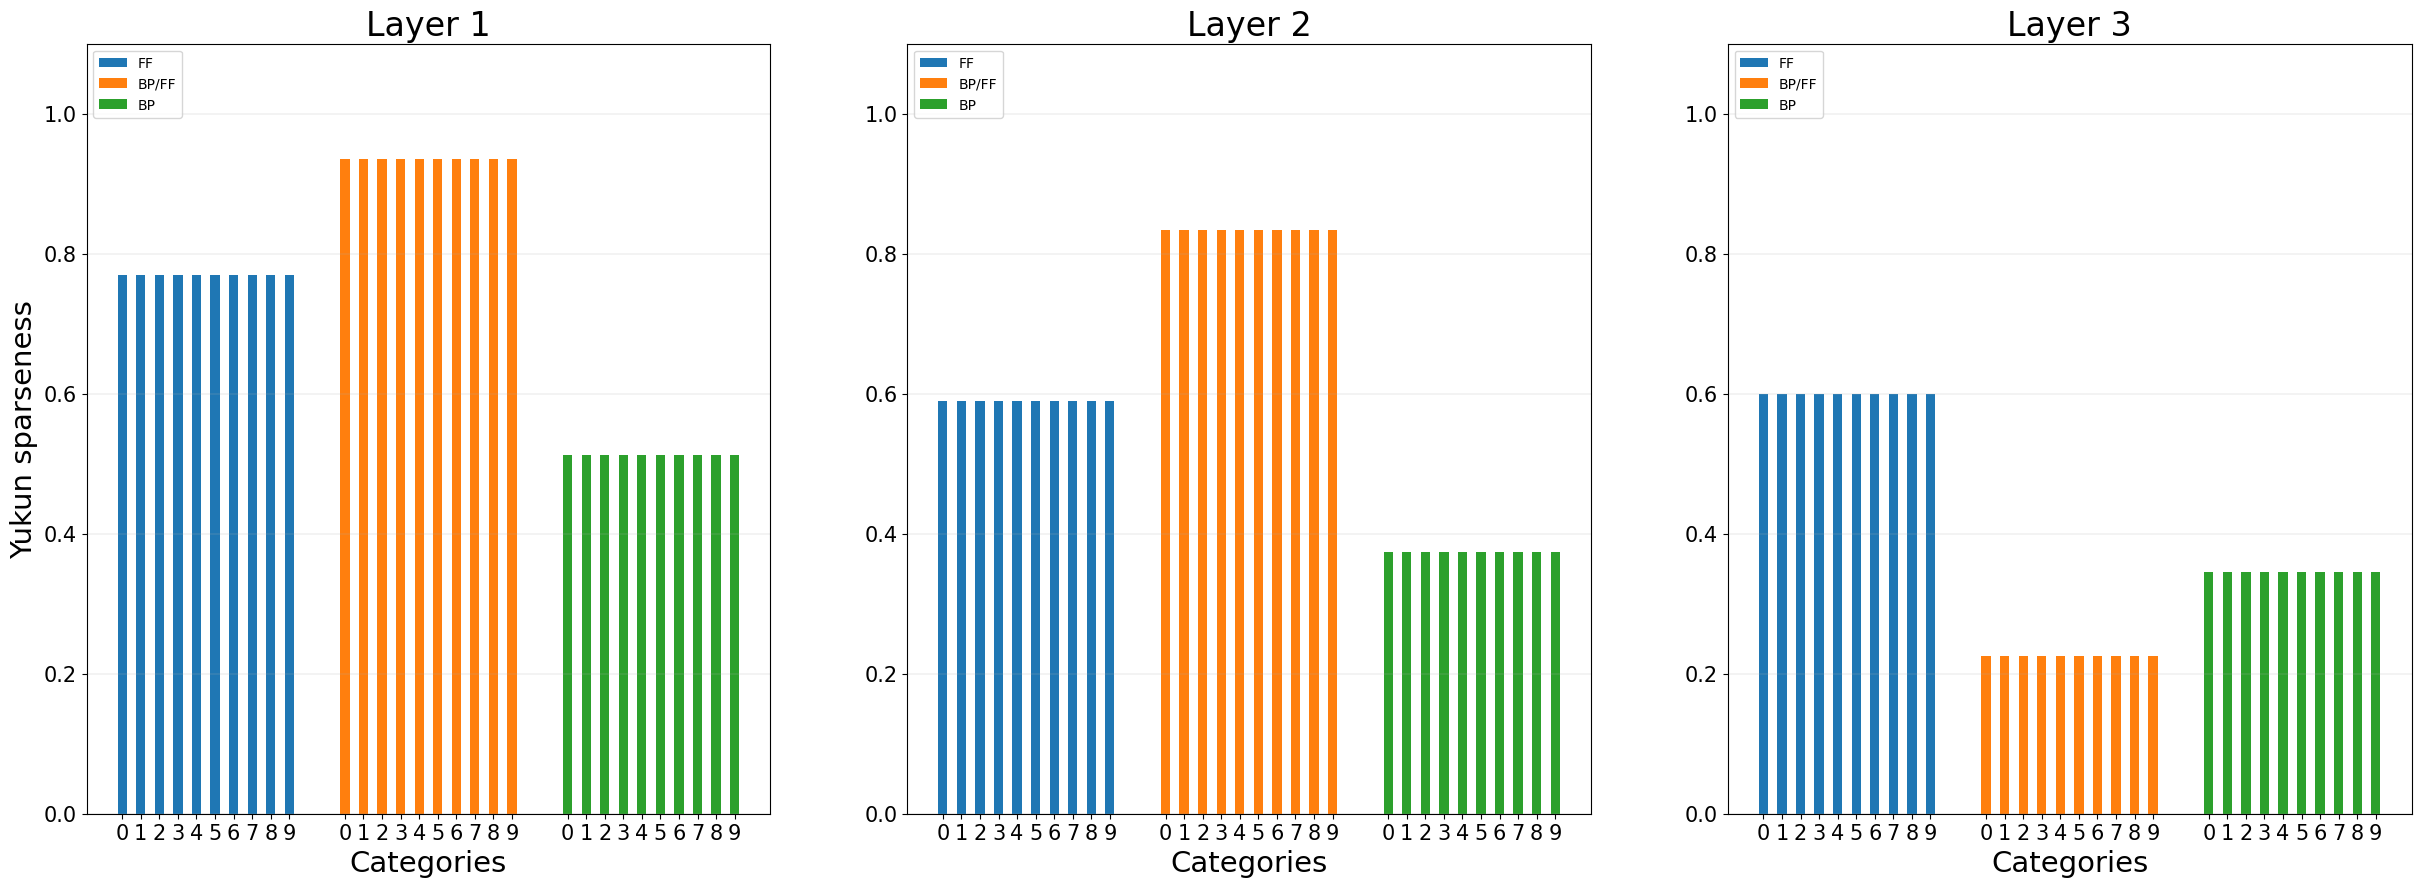

In [147]:
def calculateSize(selected_model):
    '''
    Calculate  the size of the ensembles for each model,layer and category.
    '''
    jitter=np.array([i/10 for i in range(0,10)])
    labels=[i for j in range(3) for i in range(10)]
    #with plt.style.context("_mpl-gallery-nogrid"):
    plt.figure(figsize=(30,10))
    for layer in range(3):
        plt.subplot(1,3,1+layer)
        i=0
        ticks=list()
        for model in ['ff','bp_ff','bp']:
            i+=1.2
            dataframe,index=selected_model[model]
            
            units=dataframe.loc[index][f"sparseness_layer_{layer}"]
            plt.ylim([0,1.1])
            #plt.yscale("log")
            plt.bar(i+jitter,units,label=model,width=0.05)
            ticks+=(i+jitter).tolist()
        plt.legend(labels=['FF','BP/FF','BP'],loc='upper left')
        plt.title(f'Layer {layer+1}',fontsize=24)
        plt.xticks(ticks=ticks, labels=labels,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel("Categories",fontsize=21)
        if layer==0:
            plt.ylabel("Yukun sparseness",fontsize=21)
        plt.grid(axis="y",which="both",linewidth=0.2)

calculateSize(selected_model)